In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, losses, metrics, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds

# Load CIFAR-10 dataset
train_data, info = tfds.load('cifar10', split='train', with_info=True)

# Extract images and normalize between -1 and 1
normalized_images = []
for example in train_data:
    image = example['image']
    # Normalize pixel values between -1 and 1
    normalized_image = (tf.cast(image, tf.float32) / 127.5) - 1.0
    normalized_images.append(normalized_image)

# Convert the list of tensors to a single tensor
normalized_images = tf.stack(normalized_images)

print("Normalized images shape:", normalized_images.shape)


2024-02-12 22:48:48.495705: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

2024-02-12 22:48:52.741049: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Shuffling /home/abdallah/tensorflow_datasets/cifar10/3.0.2.incomplete7BBKNO/cifar10-train.tfrecord*...:   0%| …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /home/abdallah/tensorflow_datasets/cifar10/3.0.2.incomplete7BBKNO/cifar10-test.tfrecord*...:   0%|  …

Dataset cifar10 downloaded and prepared to /home/abdallah/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Normalized images shape: (50000, 32, 32, 3)


In [4]:
generator_input = layers.Input(shape=(200,))
x = layers.Reshape((1, 1, 200))(generator_input)
x = layers.Conv2DTranspose(
    512, kernel_size=4, strides=1, padding="valid", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(
    256, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(
    128, kernel_size=4, strides=2, padding="same", use_bias=False
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
generator_output = layers.Conv2DTranspose(
    3, activation="tanh", kernel_size=4, strides=2, use_bias=False, padding="same"
)(x)
generator = keras.models.Model(generator_input, generator_output)

In [5]:
generator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 200)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose                │ (None, 4, 4, 512)         │  1,638,400 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 4, 4, 512)         │      2,048 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 4, 4, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_1              │ (None, 8, 8, 256)         │  2,097,152 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)         │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 128)       │    524,288 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)       │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 3)         │      6,144 │
│ (Conv2DTranspose)               │                           │            │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,269,568 (16.29 MB)

 Trainable params: 4,267,776 (16.28 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [6]:
discr_input = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, kernel_size=4, padding="same", strides=2, use_bias=False)(
    discr_input
)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(128, kernel_size=4, padding="same", strides=2, use_bias=False)(
    x
)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(256, kernel_size=4, padding="same", strides=2, use_bias=False)(
    x
)
x = layers.BatchNormalization(momentum=0.9)(x)

x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(
    1, kernel_size=4, padding="valid", use_bias=False, activation="sigmoid", strides=1
)(x)
discr_output = layers.Flatten()(x)

discriminator = keras.models.Model(discr_input, discr_output)

In [7]:
discriminator.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)        │      3,072 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)         │    131,072 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)         │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)         │    524,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 4, 4, 256)         │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 4, 4, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 1)           │      4,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 1)                 │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 664,064 (2.53 MB)

 Trainable params: 663,296 (2.53 MB)

 Non-trainable params: 768 (3.00 KB)

In [8]:
NOISE_PARAM = 0.1

class DCGAN(models.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(DCGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer):
        super(DCGAN, self).compile()
        self.loss_fn = losses.BinaryCrossentropy()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_metric = metrics.Mean(name="d_loss")
        self.d_real_acc_metric = metrics.BinaryAccuracy(name="d_real_acc")
        self.d_fake_acc_metric = metrics.BinaryAccuracy(name="d_fake_acc")
        self.d_acc_metric = metrics.BinaryAccuracy(name="d_acc")
        self.g_loss_metric = metrics.Mean(name="g_loss")
        self.g_acc_metric = metrics.BinaryAccuracy(name="g_acc")

    @property
    def metrics(self):
        return [
            self.d_loss_metric,
            self.d_real_acc_metric,
            self.d_fake_acc_metric,
            self.d_acc_metric,
            self.g_loss_metric,
            self.g_acc_metric,
        ]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim)
        )

        # Train the discriminator on fake images
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator(
                random_latent_vectors, training=True
            )
            real_predictions = self.discriminator(real_images, training=True)
            fake_predictions = self.discriminator(
                generated_images, training=True
            )

            real_labels = tf.ones_like(real_predictions)
            real_noisy_labels = real_labels + NOISE_PARAM * tf.random.uniform(
                tf.shape(real_predictions)
            )
            fake_labels = tf.zeros_like(fake_predictions)
            fake_noisy_labels = fake_labels - NOISE_PARAM * tf.random.uniform(
                tf.shape(fake_predictions)
            )

            d_real_loss = self.loss_fn(real_noisy_labels, real_predictions)
            d_fake_loss = self.loss_fn(fake_noisy_labels, fake_predictions)
            d_loss = (d_real_loss + d_fake_loss) / 2.0

            g_loss = self.loss_fn(real_labels, fake_predictions)

        gradients_of_discriminator = disc_tape.gradient(
            d_loss, self.discriminator.trainable_variables
        )
        gradients_of_generator = gen_tape.gradient(
            g_loss, self.generator.trainable_variables
        )

        self.d_optimizer.apply_gradients(
            zip(gradients_of_discriminator, discriminator.trainable_variables)
        )
        self.g_optimizer.apply_gradients(
            zip(gradients_of_generator, generator.trainable_variables)
        )

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.d_real_acc_metric.update_state(real_labels, real_predictions)
        self.d_fake_acc_metric.update_state(fake_labels, fake_predictions)
        self.d_acc_metric.update_state(
            [real_labels, fake_labels], [real_predictions, fake_predictions]
        )
        self.g_loss_metric.update_state(g_loss)
        self.g_acc_metric.update_state(real_labels, fake_predictions)

        return {m.name: m.result() for m in self.metrics}

In [9]:
dcgan = DCGAN(
    discriminator=discriminator, generator=generator, latent_dim=200
)

In [10]:
dcgan.compile(
    d_optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999),
    g_optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999),
)

In [11]:
dcgan.fit(normalized_images, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 366s 228ms/step - d_acc: 0.8372 - d_fake_acc: 0.8567 - d_loss: 0.2491 - d_real_acc: 0.8178 - g_acc: 0.1433 - g_loss: 2.4243
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 327s 209ms/step - d_acc: 0.7202 - d_fake_acc: 0.7272 - d_loss: 0.5099 - d_real_acc: 0.7132 - g_acc: 0.2728 - g_loss: 1.4253
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 334s 214ms/step - d_acc: 0.7859 - d_fake_acc: 0.7933 - d_loss: 0.3890 - d_real_acc: 0.7786 - g_acc: 0.2067 - g_loss: 1.7265
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 410s 262ms/step - d_acc: 0.7570 - d_fake_acc: 0.7612 - d_loss: 0.4510 - d_real_acc: 0.7528 - g_acc: 0.2388 - g_loss: 1.5763
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 409s 262ms/step - d_acc: 0.7498 - d_fake_acc: 0.7537 - d_loss: 0.4617 - d_real_acc: 0.7459 - g_acc: 0.2463 - g_loss: 1.5327
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 358s 229ms/step - d_acc: 0.7702 - d_fake_acc: 0.7791 - d_loss: 0.4254 - d_real_acc: 0.7613 - g_acc: 0.2209 - g_loss: 1.6273
Epoc

In [12]:
grid_width, grid_height = (10, 3)
# sample from a gaussian distribution 
z_sample = np.random.normal(size=(grid_width * grid_height, 200))

In [13]:
reconstructions = generator.predict(z_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [14]:
def plot_images(images):

    titles = ["Image {}".format(i + 1) for i in range(len(images))]

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_title(titles[i])
        ax.axis("off")

    plt.tight_layout()
    plt.show()

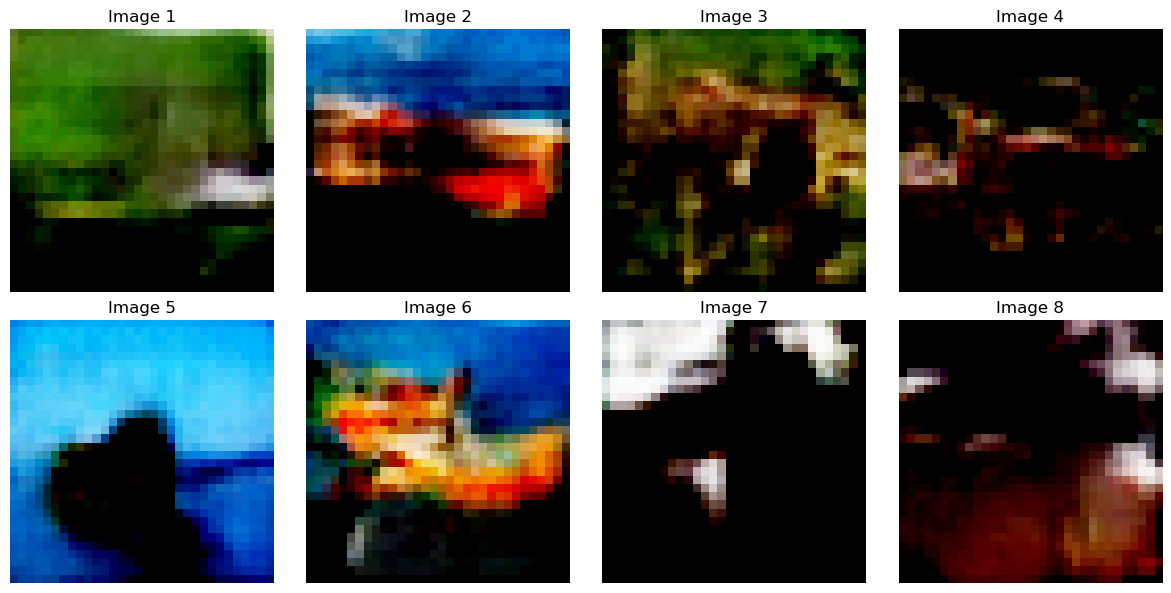

In [15]:
plot_images(reconstructions)

In [20]:
z_sample = np.random.normal(size=(grid_width * grid_height, 200))

In [21]:
reconstructions = generator.predict(z_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


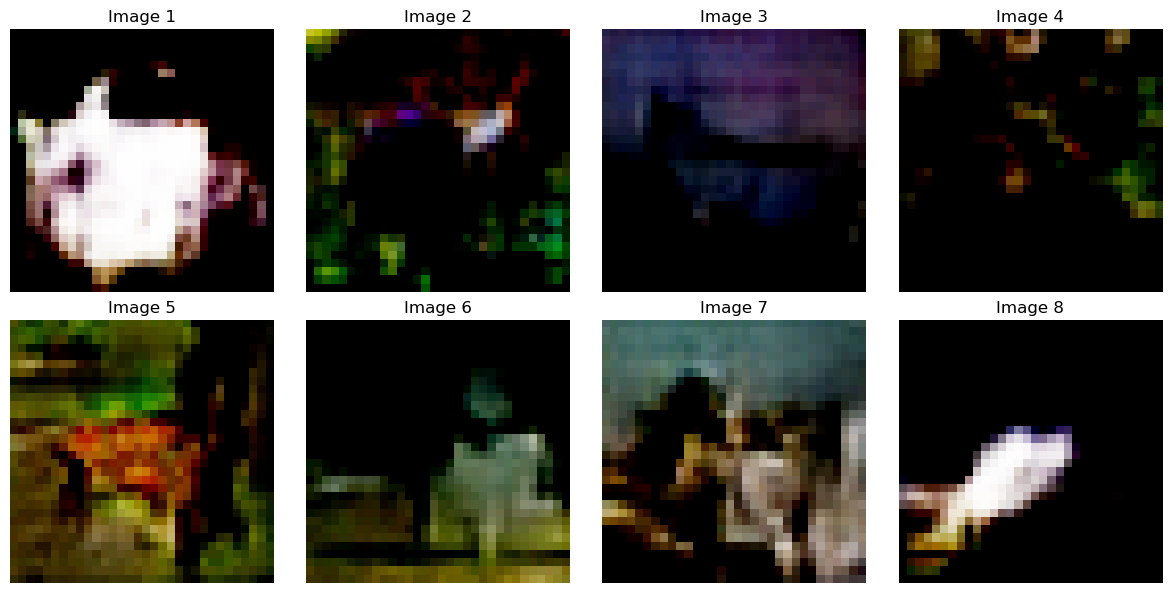

In [22]:
plot_images(reconstructions)